In [1]:
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.layers as layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-10-14 22:39:49.857966: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-14 22:39:49.890963: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-14 22:39:50.536121: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
train_augmentation = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,   
    height_shift_range=0.1 )
train_gen = train_augmentation.flow_from_directory(
        "/home/ocelot/Desktop/CNN_RPS/Archive/train",
        target_size=(100,150),
        batch_size=32,
        class_mode="categorical",
        color_mode="grayscale",
        seed=42

)

val_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    "/home/ocelot/Desktop/CNN_RPS/Archive/validation",
     target_size=(100,150),
     batch_size=32,
     class_mode="categorical",
     color_mode="grayscale",
     seed=42)


Found 1531 images belonging to 3 classes.
Found 438 images belonging to 3 classes.


In [4]:
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model = tensorflow.keras.models.Sequential([
    layer.InputLayer(shape=(100,150,1)),
    layer.Conv2D(filters=(32), kernel_size=(3,3), activation="relu"),
    layer.MaxPooling2D(pool_size=(2,2)),
    layer.Flatten(),
    layer.Dense(64, activation="relu"),
    layer.Dense(3, activation="softmax")
])

I0000 00:00:1760474408.798086  124510 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13368 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [5]:
%%time
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history=model.fit(train_gen, epochs=100, callbacks=[early_stop], validation_data=val_gen)

Epoch 1/100


/home/ocelot/env/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-10-14 22:40:13.650163: I external/local_xla/xla/service/service.cc:163] XLA service 0x7b0c58008170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-14 22:40:13.650173: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2025-10-14 22:40:13.664217: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-14 22:40:13.732669: I external/local_xla/xla/stream_executor/cuda/cuda_

11/48 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2995 - loss: 5.4973

I0000 00:00:1760474415.227749  124630 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


38/48 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3178 - loss: 3.5772

2025-10-14 22:40:16.274675: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_230', 12 bytes spill stores, 12 bytes spill loads

2025-10-14 22:40:16.363723: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_230', 4 bytes spill stores, 4 bytes spill loads



46/48 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3229 - loss: 3.3087

2025-10-14 22:40:17.864607: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_104', 12 bytes spill stores, 12 bytes spill loads

2025-10-14 22:40:17.955919: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_104', 4 bytes spill stores, 4 bytes spill loads



48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3599 - loss: 1.9142 - val_accuracy: 0.6598 - val_loss: 0.9280
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6303 - loss: 0.8898 - val_accuracy: 0.7443 - val_loss: 0.7061
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6806 - loss: 0.7737 - val_accuracy: 0.5388 - val_loss: 0.7687
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7231 - loss: 0.7070 - val_accuracy: 0.8539 - val_loss: 0.5113
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7668 - loss: 0.6348 - val_accuracy: 0.8836 - val_loss: 0.4603
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7133 - loss: 0.6793 - val_accuracy: 0.7603 - val_loss: 0.5298
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7609 - loss: 0.5903 - val_accuracy: 0.8721 - val_loss: 0.4299
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7884 - loss: 0.5585 - val_accuracy: 0.8676 - val_l

In [6]:
test_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    "/home/ocelot/Desktop/CNN_RPS/Archive/test",
     target_size=(100,150),
     batch_size=32,
     class_mode="categorical",
     color_mode="grayscale",
     shuffle=False,
     seed=42)


Found 219 images belonging to 3 classes.


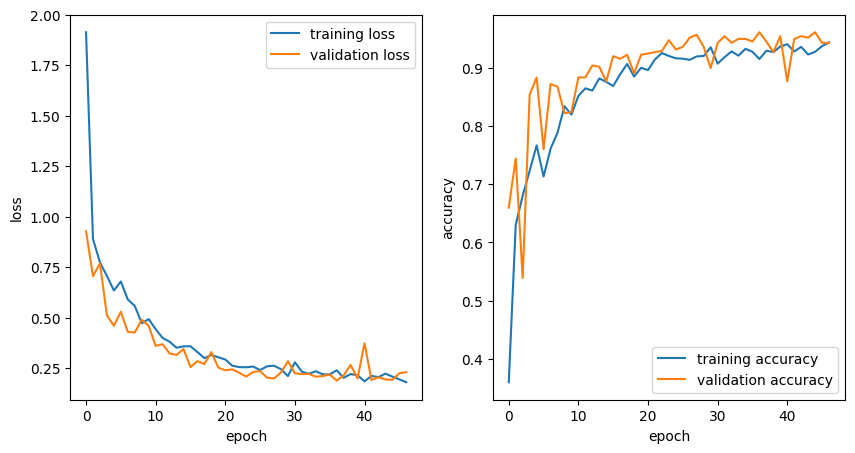

In [7]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].plot(history.history["loss"], label="training loss")
ax[0].plot(history.history["val_loss"], label="validation loss")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend()
ax[1].plot(history.history["accuracy"], label="training accuracy")
ax[1].plot(history.history["val_accuracy"], label="validation accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("accuracy")
ax[1].legend()

In [8]:
testLoss, testAccuracy = model.evaluate(test_gen)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9589 - loss: 0.1241


In [9]:
import numpy as np
from sklearn.metrics import classification_report
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)
real_label = test_gen.classes
keys = test_gen.class_indices.keys()
keys = list(keys)
report = classification_report(real_label, pred, target_names=keys, output_dict=True)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [10]:
report["scissors"]

{'precision': 0.9240506329113924,
 'recall': 0.9733333333333334,
 'f1-score': 0.948051948051948,
 'support': 75.0}

In [11]:
report["paper"]

{'precision': 0.9701492537313433,
 'recall': 0.9154929577464789,
 'f1-score': 0.9420289855072463,
 'support': 71.0}

In [12]:
report["rock"]

{'precision': 0.9863013698630136,
 'recall': 0.9863013698630136,
 'f1-score': 0.9863013698630136,
 'support': 73.0}

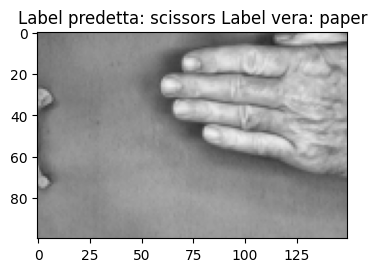

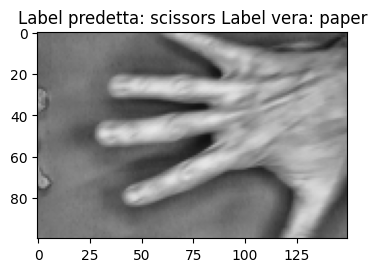

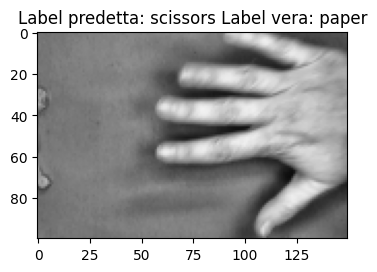

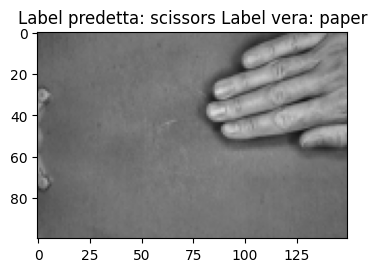

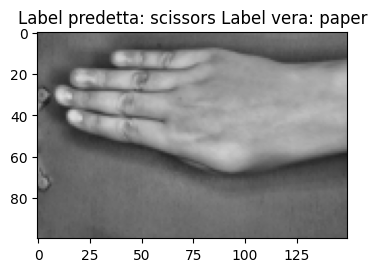

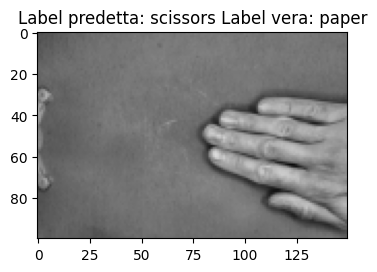

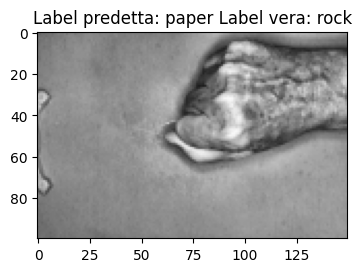

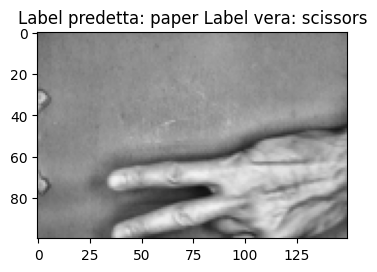

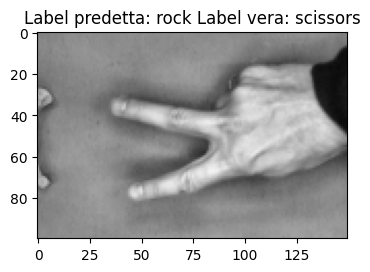

In [13]:
import cv2
errori_indice=[]
for i in range(len(real_label)):
    if real_label[i] != pred[i]:
        errori_indice.append(i)
file = test_gen.filepaths
errori = {"immagini":[], "LabelGiusta":[], "LabelPred":[]}
for i in errori_indice:
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(cv2.imread(file[i]), cv2.COLOR_BGR2RGB))
    plt.title("Label predetta: {} Label vera: {}".format(keys[pred[i]], keys[real_label[i]]))